# Estymatory największej wiarygodności

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy import optimize

# Zadanie 1
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami $\mu=1$, $\sigma=1$. 

In [2]:
N = 100000
u=stats.uniform()
data = u.rvs(size=N)
mu= 0
sigma = 1

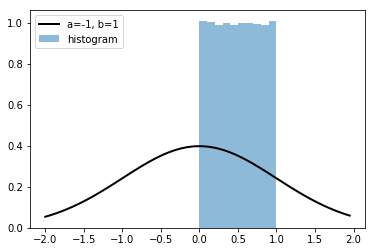

In [3]:
t = np.arange(-2, 2, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, normed=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t,mu, sigma), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()

# Zadanie 2
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami 

<ul>
<li>$\mu=\frac{1}{n}\sum_{i=1}^n x_i$</li>
<li>$\sigma^2=\frac{1}{n} \sum_{i=1}^n(x_i - \mu)^2$</li>
</ul>

0.49958796761652224
0.49958796761652224
0.28927814165374877
0.28927814165374877


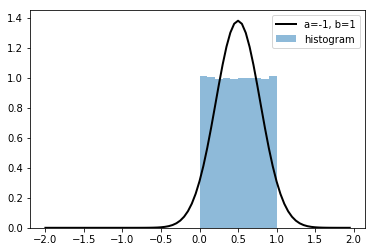

In [28]:
m = 1/N * np.sum(data)
m1 = np.mean(data) 
print(m)
print(m1)

s = np.sqrt(1/N * np.sum(  (data - m1)**2 ) )
s1 = np.std(data) 
print(s)
print(s1)

t = np.arange(-2, 2, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, normed=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t, m, s), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()

# Zadanie 3
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami otrzymanymi za pomocą funkcji <tt>fit()</tt> ze <tt>scipy.stats</tt>

In [25]:
mm, ss = stats.norm.fit(data)
print(mm)
print(ss)

0.49958796761652224
0.28927814165374877


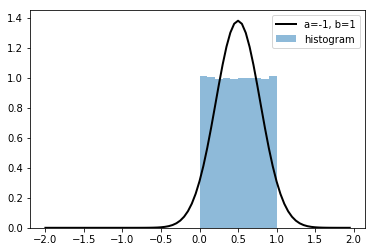

In [27]:
t = np.arange(-2, 2, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, normed=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t, mm, ss), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()

# Zadanie 4

Wiemy, że funkcja wiarygodnosci ma postać:

$$
L(X,m,\sigma)=\prod_{i=1}^n f_{m,\sigma} (x_i).
$$


Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziny rozkładów normalnych:

$$
l(X,m,\sigma)=\ln\left( L(X,m,\sigma) \right)=\ln\left(\prod_{i=1}^n f_{m,\sigma} (x_i) \right)=\sum_{i=1}^n \ln(f_{m,\sigma} (x_i))
$$

In [32]:
# split normal distribution pdf
def Gpdf(x, mu, sigma):
    return 1/(sigma * (2*np.pi)**.5) *np.e ** (-(x-mu)**2/(2 * sigma**2))

In [40]:
def l(par):
    mu, sigma = par
    return - np.sum( np.log( Gpdf(data, mu, np.abs(sigma) ) ) )

# Zadanie 5
Policz MLE dla danych z rozkładu jednostajnego i parametrów:
<ul>
<li>$\mu=0$, $\sigma=1$</li>
<li>$\mu=0$, $\sigma=2$</li>
<li>$\mu=1$, $\sigma=1$</li>
<li>$\mu=0.5$, $\sigma=0.2$</li>
</ul>
Dla których wartości wychodzi wynik największy i dlaczego?

In [41]:
print( l( (0,1) ) )
print( l( (0,2) ) )
print( l( (1,1) ) )
print( l( (0.5,0.2) ) )


108557.35235175995
165374.44613428495
108598.55559010772
35552.5783387214


# Zadanie 6
Zapoznaj się z funkcją <tt>optimize.fmin_cg</tt>
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.fmin_cg.html
i znajdż minimum funkcji

$$
f(x,y) = (x+1)^2+y^2
$$

In [42]:
def f(x):
    x1, x2 = x
    return (x1+1)**2+(x2)**2
x0 = np.asarray((0, 0))  # Initial guess.
res1 = optimize.fmin_cg(f, x0)
print(res1)

         Current function value: 0.000100
         Iterations: 1
         Function evaluations: 20
         Gradient evaluations: 2
[-1.01000000e+00 -7.52508635e-09]


# Zadanie 7
Zminimalizuj funkcją wiarygodności z Zad. 5 (numerycznie).

Czy wyniki są podobne do wyniików z poprzednich zadań?

In [43]:
x0 = np.asarray((0, 1))  # Initial guess.
res1 = optimize.fmin_cg(l, x0)
print(res1)

         Current function value: 17857.190737
         Iterations: 9
         Function evaluations: 148
         Gradient evaluations: 34
[0.49958796 0.28927813]


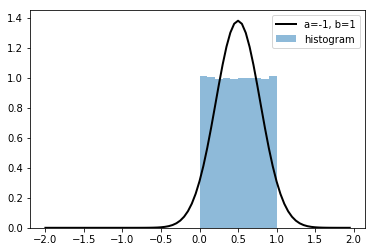

In [45]:
t = np.arange(-2, 2, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, normed=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t, res1[0], res1[1]), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()


# Zadanie 8 (dla chętnych)
Wykonaj poprzednie zadanie wykorzystując pochodne http://faculty.washington.edu/ezivot/econ583/mleLectures.pdf.

# Zadanie 9
Napisz funkcję gęstości rozkładu Split Gaussian:

$$
SN(x;m,\sigma^2,\tau^2) = \left\{ \begin{array}{ll}
c \cdot \exp[-\frac{1}{2\sigma^2}(x-m)^2], & \textrm{for $x\leq m$},\\
c \cdot \exp[-\frac{1}{2\tau^2\sigma^2}(x-m)^2], & \textrm{for $x>m$},\\
\end{array} \right.
$$

gdzie $c=\sqrt{\frac{2}{\pi}}\sigma^{-1}(1+\tau)^{-1}$.

Narysuj gęstości dla parametrów:

<ul>
<li>$\mu=0$, $\sigma=1$, $\tau=1$</li>
<li>$\mu=0$, $\sigma=1$, $\tau=1/2$</li>
<li>$\mu=1$, $\sigma=1/2$, $\tau=1$</li>
</ul>

In [79]:
# split normal distribution pdf
def SGpdf(x, mu, sigma, tau):
    c = np.sqrt(2/np.pi)*(sigma**(-1.))*(  (1 + tau) **(-1.))
    if( x <= mu ):
        return c * np.e ** (-(x-mu)**2/(2 * sigma**2))
    else:
        return c * np.e ** (-(x-mu)**2/(2 * sigma**2 * tau**2))

In [85]:
print( SGpdf(1, 0, 1, 1) )

0.24197072451914337


In [86]:
SGpdf_vec = np.vectorize(SGpdf)

No handles with labels found to put in legend.


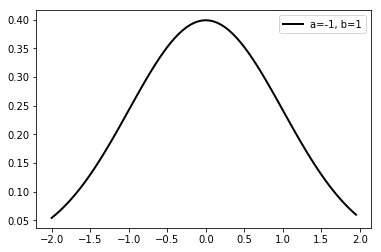

In [87]:
t = np.arange(-2, 2, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.legend(loc='best', frameon=False)
ax.plot(t, SGpdf_vec(t, 0, 1, 1), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()

No handles with labels found to put in legend.


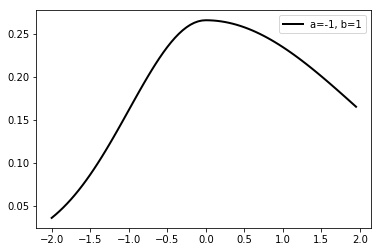

In [88]:
t = np.arange(-2, 2, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.legend(loc='best', frameon=False)
ax.plot(t, SGpdf_vec(t, 0, 1, 2), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()

No handles with labels found to put in legend.


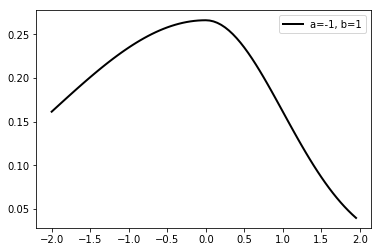

In [89]:
t = np.arange(-2, 2, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.legend(loc='best', frameon=False)
ax.plot(t, SGpdf_vec(t, 0, 2, 1/2), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()

No handles with labels found to put in legend.


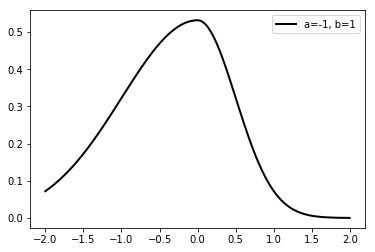

In [90]:
t = np.arange(-2, 2, 0.005)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.legend(loc='best', frameon=False)
ax.plot(t, SGpdf_vec(t, 0, 1, 1/2), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()

# Zadanie 10

Wiemy, że funkcja wiarygodnosci ma postać:

$$
L(X,m,\sigma,\tau)=\prod_{i=1}^n f_{m,\sigma,\tau} (x_i).
$$

Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziny rozkładów Split Normal:

$$
l(X,m,\sigma,\tau)=\ln\left( L(X,m,\sigma,\tau) \right)=\ln\left(\prod_{i=1}^n f_{m,\sigma,\tau} (x_i) \right)=\sum_{i=1}^n \ln(f_{m,\sigma,\tau} (x_i))
$$

In [94]:
def l(par):
    mu, sigma, tau = par
    return - np.sum( np.log( SGpdf_vec(data, mu, np.abs(sigma), np.abs(tau) ) ) )

# Zadanie 11
Zminimalizuj funkcją wiarygodności z Zad. 10 (numerycznie).

In [115]:
N = 1000
u=stats.uniform()
data = u.rvs(size=N)

x0 = np.asarray((0, 1, 1.1))  # Initial guess.
res1 = optimize.fmin_cg(l, x0)
print(res1)

         Current function value: 136.374319
         Iterations: 46
         Function evaluations: 872
         Gradient evaluations: 172
[0.99711559 0.55297835 0.00302341]


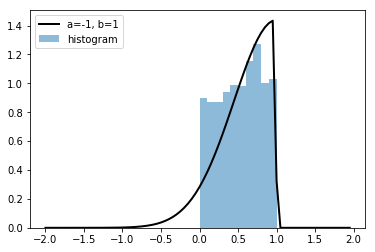

In [116]:
t = np.arange(-2, 2, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, normed=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, SGpdf_vec(t, res1[0], res1[1], res1[2]), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()


# Zadanie 12
Zaimportuj dane <tt>datasets</tt> i wyestymuj rozkład normalny i Split Normal dla <tt>boston.data[:,7]</tt>.

Rozpocznij procedurę minimalizacji od warunku początkowego:

<ul>
<li>mu=np.mean(data)</li>
<li>sigma=np.std(data)</li>
<li>tau=np.std(data)</li>
</ul>

Który rozkład lepiej pasuje do danych?

In [105]:
from sklearn import datasets
boston = datasets.load_boston()
data=boston.data[:,7]

In [108]:
x0 = np.asarray((0, 1, 1))  # Initial guess.
res1 = optimize.fmin_cg(l, x0)
print(res1)

         Current function value: 986.425485
         Iterations: 37
         Function evaluations: 402
         Gradient evaluations: 78
[ 1.57642114  0.24790114 12.83744304]


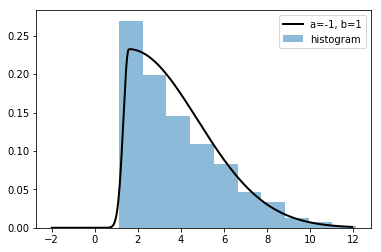

In [110]:
t = np.arange(-2, 12, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, normed=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, SGpdf_vec(t, res1[0], res1[1], res1[2]), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()